<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/gradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot  as plt
from mpl_toolkits import mplot3d
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x)= \frac{1}{1 + exp^-(w*x+b)}$ 
This is signmoid for single input x 

In [0]:
def sigmoid(w,b,x):
  return 1/(1 + np.exp(-(w*x + b )))

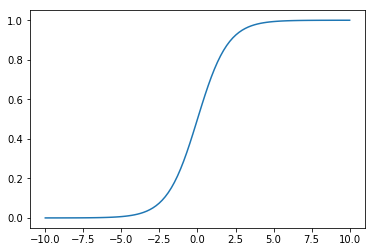

In [45]:
w =1 #@param {type: "slider", min: -2 , max :2 ,step:0.1}
b = 0 #@param {type: "slider", min: -5 , max :5 ,step :0.5}
X = np.linspace(-10,10,100)
Y = sigmoid(w,b,X)
plt.plot(X,Y)
plt.show()

$S_{w1,w2,b}(x1,x2)= \frac{1}{1 + exp ^ -(w1*x1 + w2*x2 + b)}$ 
This is Sigmoid in more than one input variable 

In [0]:
def sigmoid_2d(w1,w2,x1,x2,b):
  return (1/ (1 + np.exp(-(w1*x1 + w2*x2 +b))))

Plotting 3d sigmoid using matplotlib

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(X1, X2)



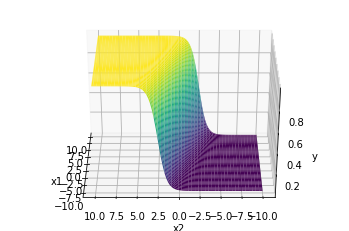

In [48]:
w1 = 0.5 
w2 = 2 
b = 0 
Y = sigmoid_2d(w1,w2,XX1,XX2,b)
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1,XX2,Y, cmap ='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,180)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)


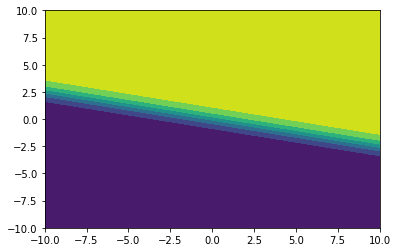

In [49]:
plt.contourf(XX1,XX2,Y,aplha = 0.6)
plt.show()

#Calculating the Loss function
step 1 : to create the valid dataset 
step 2 : iterate and calcualte the loss and estiamte the w mn 

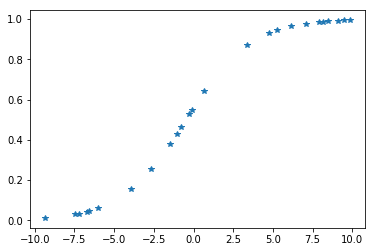

In [50]:
w_unknown = 0.5 
b_unknown = 0.25
X = np.random.random(25)*20-10 #the 20 is for the range of -10 to 10 and subtaction of 10 is to center it to 0
Y = sigmoid(w_unknown, b_unknown, X)
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(w_est,b_est,x))**2
  return loss

In [0]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)
WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

    
               
               
  

Text(0.5, 0, 'Loss')

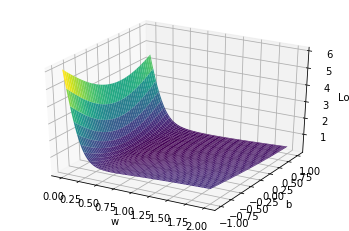

In [53]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW,BB,Loss, cmap ='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
#ax.view_init(30,270)

Find the minimum loss indices and corresponding W and B

In [54]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

print(i,j)
print(WW[i,j])
print(BB[i,j])

62 25
0.5050505050505051
0.2525252525252526


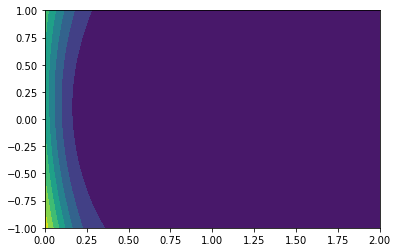

In [55]:
plt.contourf(WW,BB,Loss)
plt.show()

#Sigmoid Neuron

In [0]:
class SigmoidNeuron : 
  
  def __init__(self):
    self.w = None 
    self.b = None 
  
  def perceptron ( self, x) :
    return (np.dot(x,self.w.T)+ self.b)
  
  def sigmoid(self,x):
    return (1 / (1  + np.exp(-x)))
  
  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred-y)*y_pred*(1-y_pred)*x)
  
  def grad_b(self,x,y): 
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred-y)*y_pred*(1-y_pred))
  
  def fit(self, X ,Y ,epochs = 1, learning_rate =1 , initialise = True , display_loss = False ): 
      if (initialise):
        #initialize the weights 
        self.w = np.random.randn(1, X.shape[1])
        self.b = 0
      if display_loss :
        loss = {}
      for i in tqdm_notebook(range(epochs),total = epochs, unit='epochs'):
        dw = 0 
        db = 0
        for x,y in zip(X,Y):
          dw += self.grad_w(x,y)
          db += self.grad_b(x,y)
        
        self.w -= learning_rate * dw 
        self.b -= learning_rate * db
        if display_loss:
          Y_pred = self.sigmoid(self.perceptron(X))
          loss[i] = mean_squared_error(Y_pred, Y)
      if display_loss:
        plt.plot(loss.values())
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
        
  def predict(self,X):
    Y_pred = []
    for x in X :
      pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(pred)
    return np.array(Y_pred)
    
        

#Testing withthe Toy data 

In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,alpha =0.6)
  ax.scatter(X[:,0],X[:,1], c =Y)
  ax.plot()

[[ 0.81673891 -2.26224197]] [0.00119624]
[[ 0.83264327 -2.24608431]] [0.00727149]
[[ 0.84985582 -2.22858705]] [0.01384536]
[[ 0.86859424 -2.20952716]] [0.02100011]
[[ 0.88913137 -2.18862489]] [0.02883864]
[[ 0.9118141  -2.16552423]] [0.03749149]
[[ 0.93709029 -2.13976494]] [0.04712666]
[[ 0.96554765 -2.11074212]] [0.05796377]
[[ 0.99796998 -2.07764724]] [0.07029408]
[[ 1.03541771 -2.039383  ]] [0.08450856]
[[ 1.07933696 -1.99444563]] [0.10113378]
[[ 1.1316815  -1.94078649]] [0.12086582]
[[ 1.19494624 -1.87574435]] [0.14455288]
[[ 1.27171897 -1.7964197 ]] [0.17294945]
[[ 1.36265394 -1.70153822]] [0.20575881]


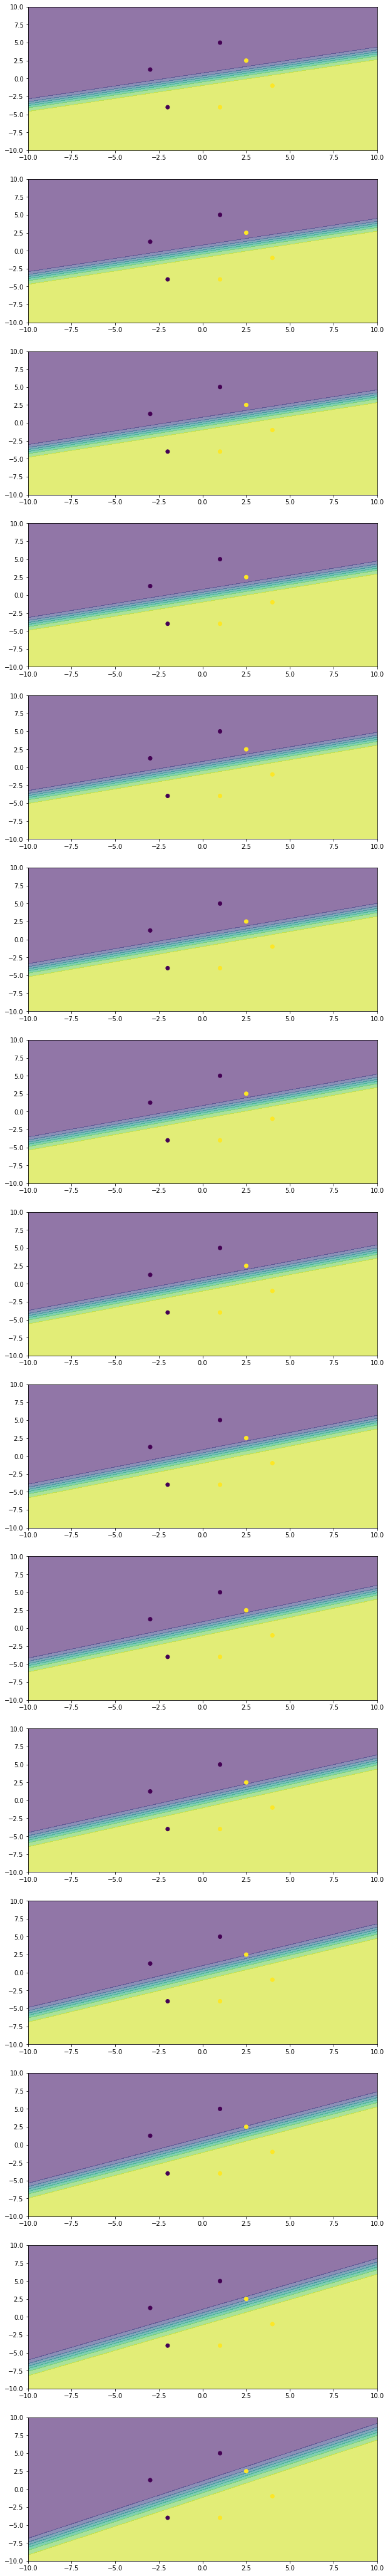

In [58]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.05,True)
N =15
plt.figure(figsize =(10,N*5))

#no initializing the weights 
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1 , i + 1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.25,False)

#Load Data Real world problem

In [0]:
data = pd.read_csv('mobile_cleaned.csv')
data.head()
X = data.drop('Rating', axis =1 )
Y = data['Rating']


In [0]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)
data['Class'].value_counts(normalize= True)
Y_binarized = data['Class'].values

#Standardization 

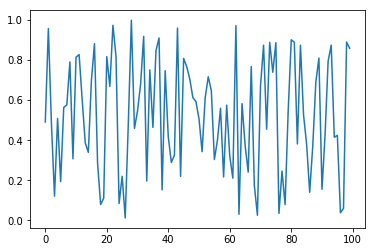

0.5231099292055846
0.283555420394881


In [61]:
from sklearn.preprocessing import StandardScaler
R = np.random.random([100,1])
plt.plot(R)
plt.show()
print(np.mean(R))
print(np.std(R))

-2.9087843245179103e-16
1.0000000000000002


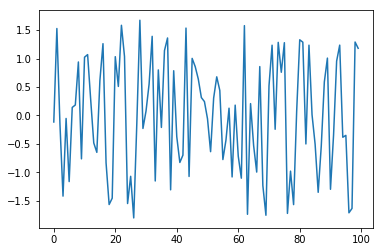

In [62]:
scaler = StandardScaler()
scaler.fit(R)
scaler.mean_
RT = scaler.transform(R)
print(np.mean(RT))
print(np.std(RT))
plt.plot(RT)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify = Y_binarized , random_state = 0)
#we wil fit and transform the train and use the same model to transform the test data set.
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
#we need to scaled the Y between 0 and 1 hence use MInMAxScaler
minmaxScaler = MinMaxScaler()
Y_scaled_train = minmaxScaler.fit_transform(Y_train.values.reshape(-1,1))
Y_scaled_test = minmaxScaler.transform(Y_test.values.reshape(-1,1))
#since everything is scaled the threshold needs to be scaled too
scaled_threshold = list(minmaxScaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]
#Now binaried the output to have scaled version of binary classifications
Y_binarized_train = (Y_scaled_train >= scaled_threshold).astype(np.int).ravel()
Y_binarized_test = (Y_scaled_test >= scaled_threshold).astype('int').ravel()

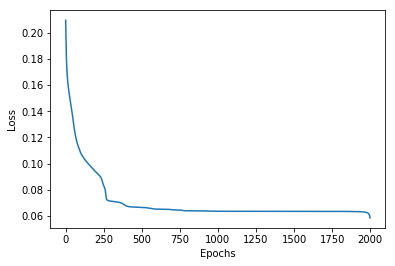

In [113]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, epochs = 2000, learning_rate = 0.015 ,display_loss =True )

In [0]:
y_pred_train = sn.predict(X_scaled_train)
y_pred_test  = sn.predict(X_scaled_test)

y_pred_binarized_train = (y_pred_train >= scaled_threshold).astype(np.int).ravel()
y_pred_binarized_test  = (y_pred_test >= scaled_threshold).astype(np.int).ravel()

In [110]:
print(accuracy_score(y_pred_binarized_train,Y_binarized_train))
print(accuracy_score(y_pred_binarized_test,Y_binarized_test))

0.7254901960784313
0.7093023255813954
